In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
df = pd.read_excel("/content/drive/MyDrive/comsumer_temperature/datasets/consumption.xlsx")
df.head(20)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,統計名：,家計消費状況調査 平成29年改定（2015年1月～） 二人以上の世帯,Unnamed: 2,Unnamed: 3
0,表番号：,1-1,NaN,NaN
1,表題：,[インターネットを利用した1世帯当たり1か月間の支出] 全国・地方・都市階級別,NaN,NaN
2,実施年月：,-,-,NaN
3,表章項目：,00000,１世帯当たり１か月間の支出額,NaN
4,世帯区分(平成29年改定)：,0030,二人以上の世帯,NaN
5,品目区分(平成29年改定)：,0720,自宅用計【円】,NaN
6,全国・地方・都市階級(平成29年改定)：,0050,関東,NaN
7,NaN,NaN,NaN,NaN
8,時間軸（月次・四半期・年次） コード,時間軸（月次・四半期・年次）,値,注釈
9,2023000808,2023年8月,"29,398",NaN


In [117]:
df = df.iloc[8:, :].reset_index()
df.columns

Index(['index', '統計名：', '家計消費状況調査 平成29年改定（2015年1月～） 二人以上の世帯', 'Unnamed: 2',
       'Unnamed: 3'],
      dtype='object')

In [118]:
df = df[['統計名：', '家計消費状況調査 平成29年改定（2015年1月～） 二人以上の世帯', "Unnamed: 2"]]

In [119]:
df.columns = ["日付コード", "日付", "支出"]
df = df.iloc[1:, :]

In [120]:
df = df[::-1].reset_index().drop(["index"], axis=1)
df

,日付コード,日付,支出
0,2015000101,2015年1月,"11,599"
1,2015000202,2015年2月,"10,397"
2,2015000303,2015年3月,"10,802"
3,2015000404,2015年4月,"10,238"
4,2015000505,2015年5月,"10,602"
...,...,...,...
99,2023000404,2023年4月,"27,006"
100,2023000505,2023年5月,"27,586"
101,2023000606,2023年6月,"27,533"
102,2023000707,2023年7月,"29,395"


In [121]:
df.to_csv("/content/drive/MyDrive/comsumer_temperature/datasets/comsumption.csv")

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日付コード   104 non-null    object
 1   日付      104 non-null    object
 2   支出      104 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


In [123]:
df.tail()

,日付コード,日付,支出
99,2023000404,2023年4月,"27,006"
100,2023000505,2023年5月,"27,586"
101,2023000606,2023年6月,"27,533"
102,2023000707,2023年7月,"29,395"
103,2023000808,2023年8月,"29,398"


In [124]:
df["日付"] = df["日付"].astype(str)
df["日付"] = pd.to_datetime(df["日付"], format="%Y年%m月")
df["POSIX"] = df["日付"].astype(np.int64) // 10**9
df["年"] = df["日付"].dt.year
df["月"] = df["日付"].dt.month

In [125]:
df["支出"] = df["支出"].str.replace(",", "")
df["支出"] = pd.to_numeric(df["支出"])

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日付コード   104 non-null    object        
 1   日付      104 non-null    datetime64[ns]
 2   支出      104 non-null    int64         
 3   POSIX   104 non-null    int64         
 4   年       104 non-null    int64         
 5   月       104 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 5.0+ KB


In [127]:
df.head()

,日付コード,日付,支出,POSIX,年,月
0,2015000101,2015-01-01,11599,1420070400,2015,1
1,2015000202,2015-02-01,10397,1422748800,2015,2
2,2015000303,2015-03-01,10802,1425168000,2015,3
3,2015000404,2015-04-01,10238,1427846400,2015,4
4,2015000505,2015-05-01,10602,1430438400,2015,5


In [128]:
df2 = df.copy()

month = 5

for i in range(1, month):
    df2[f"{i}mago"] = df2["支出"].shift(i)
    df2[f"{i}mago"] = df2[f"{i}mago"].fillna(0)


df2.to_csv("/content/drive/MyDrive/comsumer_temperature/datasets/comsumption_2.csv")

In [129]:
month = 5

for i in range(1, month):
    df[f"{i}mago"] = df["支出"].shift(i)
df = df.dropna(subset=[f"{i}mago"], axis=0)
df = df.reset_index(drop=True)

In [130]:
df

,日付コード,日付,支出,POSIX,年,月,1mago,2mago,3mago,4mago
0,2015000505,2015-05-01,10602,1430438400,2015,5,10238.0,10802.0,10397.0,11599.0
1,2015000606,2015-06-01,11586,1433116800,2015,6,10602.0,10238.0,10802.0,10397.0
2,2015000707,2015-07-01,11241,1435708800,2015,7,11586.0,10602.0,10238.0,10802.0
3,2015000808,2015-08-01,11962,1438387200,2015,8,11241.0,11586.0,10602.0,10238.0
4,2015000909,2015-09-01,9788,1441065600,2015,9,11962.0,11241.0,11586.0,10602.0
...,...,...,...,...,...,...,...,...,...,...
95,2023000404,2023-04-01,27006,1680307200,2023,4,27609.0,25697.0,26056.0,29865.0
96,2023000505,2023-05-01,27586,1682899200,2023,5,27006.0,27609.0,25697.0,26056.0
97,2023000606,2023-06-01,27533,1685577600,2023,6,27586.0,27006.0,27609.0,25697.0
98,2023000707,2023-07-01,29395,1688169600,2023,7,27533.0,27586.0,27006.0,27609.0


In [131]:
df.head()
df.to_csv("/content/drive/MyDrive/comsumer_temperature/datasets/comsumption_3.csv")

In [132]:
df.head()

,日付コード,日付,支出,POSIX,年,月,1mago,2mago,3mago,4mago
0,2015000505,2015-05-01,10602,1430438400,2015,5,10238.0,10802.0,10397.0,11599.0
1,2015000606,2015-06-01,11586,1433116800,2015,6,10602.0,10238.0,10802.0,10397.0
2,2015000707,2015-07-01,11241,1435708800,2015,7,11586.0,10602.0,10238.0,10802.0
3,2015000808,2015-08-01,11962,1438387200,2015,8,11241.0,11586.0,10602.0,10238.0
4,2015000909,2015-09-01,9788,1441065600,2015,9,11962.0,11241.0,11586.0,10602.0


In [133]:
N = len(df["POSIX"])
N

100

In [134]:
df.columns

Index(['日付コード', '日付', '支出', 'POSIX', '年', '月', '1mago', '2mago', '3mago',
       '4mago'],
      dtype='object')

In [135]:
N_train = round(N * .8)

In [136]:
X = df.drop(['日付コード', '日付', "年", "月"], axis=1).values
y = df["支出"].values

In [137]:
from sklearn.ensemble import RandomForestRegressor

X_train, y_train = X[:N_train], y[:N_train]
X_test, y_test = X[N_train:], y[N_train:]

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [138]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [139]:
y_pred = rf.predict(X_test)

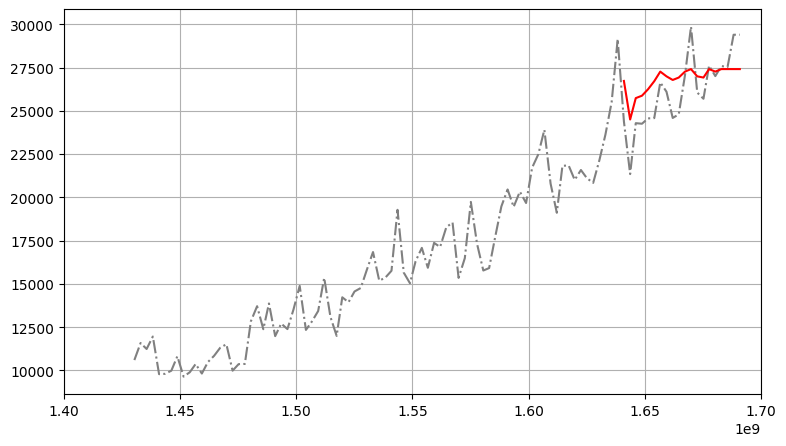

In [140]:
plt.figure(figsize=(9, 5))
plt.plot(X, y, color="grey", linestyle="dashdot")
plt.plot(X_test, y_pred, color="red")
plt.xlim([1.4e9, 1.7e9])
plt.grid()
plt.show()

In [141]:
print(f"train R2: {rf.score(X_train, y_train)}")
print(f"test R2: {r2_score(y_test, y_pred)}")

train R2: 0.9973494698913125
test R2: 0.36280665161349623


In [142]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

1650.2738653917413
1387.4334999999999
